In [1]:
'''
PCA: a dimensionality reduction technique used to simplify complex data by transforming it into a smaller 
set of uncorrelated variables called principal components

performing PCA for iris dataset

'''

'\nPCA: a dimensionality reduction technique used to simplify complex data by transforming it into a smaller \nset of uncorrelated variables called principal components\n\nperforming PCA for iris dataset\n\n'

In [3]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [7]:
# load the data
iris = load_iris()
x = iris.data
y = iris.target

# as PCA is unsupervise, if target label will be in the features set it might distort direction of max variance

# mean vector
mean_vec = np.mean(x, axis=0)
print(mean_vec)

x_centered = x - mean_vec
print(x_centered)

[5.84333333 3.05733333 3.758      1.19933333]
[[-7.43333333e-01  4.42666667e-01 -2.35800000e+00 -9.99333333e-01]
 [-9.43333333e-01 -5.73333333e-02 -2.35800000e+00 -9.99333333e-01]
 [-1.14333333e+00  1.42666667e-01 -2.45800000e+00 -9.99333333e-01]
 [-1.24333333e+00  4.26666667e-02 -2.25800000e+00 -9.99333333e-01]
 [-8.43333333e-01  5.42666667e-01 -2.35800000e+00 -9.99333333e-01]
 [-4.43333333e-01  8.42666667e-01 -2.05800000e+00 -7.99333333e-01]
 [-1.24333333e+00  3.42666667e-01 -2.35800000e+00 -8.99333333e-01]
 [-8.43333333e-01  3.42666667e-01 -2.25800000e+00 -9.99333333e-01]
 [-1.44333333e+00 -1.57333333e-01 -2.35800000e+00 -9.99333333e-01]
 [-9.43333333e-01  4.26666667e-02 -2.25800000e+00 -1.09933333e+00]
 [-4.43333333e-01  6.42666667e-01 -2.25800000e+00 -9.99333333e-01]
 [-1.04333333e+00  3.42666667e-01 -2.15800000e+00 -9.99333333e-01]
 [-1.04333333e+00 -5.73333333e-02 -2.35800000e+00 -1.09933333e+00]
 [-1.54333333e+00 -5.73333333e-02 -2.65800000e+00 -1.09933333e+00]
 [-4.33333333e-0

In [8]:
#covarience matrix

cov_mat = np.cov(x_centered.T)

In [9]:
eig_vals, eig_vec = np.linalg.eig(cov_mat)

In [12]:
print(eig_vec)
print(eig_vals)

# eigen vector: PCA direction
# eigen values: amt of variance captured in the direction

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
[4.22824171 0.24267075 0.0782095  0.02383509]


In [22]:
# sort to find highest covariance

idxs = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idxs]
eig_vecs = eig_vec[:, idxs]

# The first principal component should capture the largest variance.
print(eig_vec)
print(idxs)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
[0 1 2 3]


In [18]:
# Take the first 2 eigenvectors → our new axes.
W = eig_vecs[:, :2]

In [ ]:
X_pca = x_centered@ W


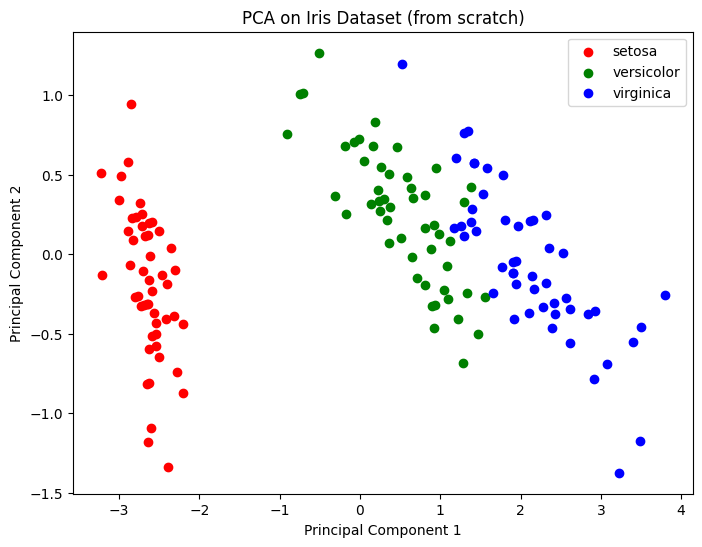

In [ ]:
plt.figure(figsize=(8,6))
for label, color in zip(np.unique(y), ['red', 'green', 'blue']):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1],
                label=iris.target_names[label], color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title("PCA on Iris Dataset (from scratch)")
plt.show()

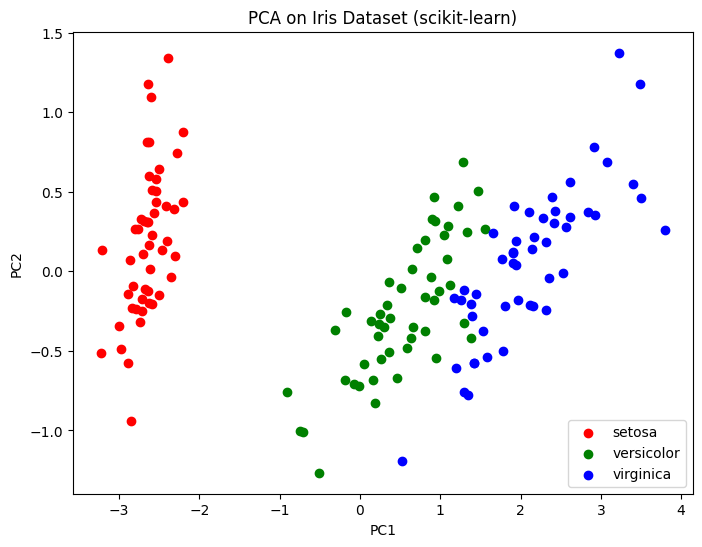

Explained variance ratio: [0.92461872 0.05306648]


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_sklearn = pca.fit_transform(x)

plt.figure(figsize=(8,6))
for label, color in zip(np.unique(y), ['red', 'green', 'blue']):
    plt.scatter(X_pca_sklearn[y==label, 0], X_pca_sklearn[y==label, 1],
                label=iris.target_names[label], color=color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title("PCA on Iris Dataset (scikit-learn)")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


In [24]:
import numpy as np
from sklearn.datasets import load_iris

# 1. Load data
iris = load_iris()
X = iris.data        # shape (150,4)
y = iris.target
print("Step 1 - Data loaded")
print("Shape of X:", X.shape)
print("First 5 rows:\n", X[:5])
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("-"*50)

# 2. Calculate mean of each feature
mean_vec = np.mean(X, axis=0)
print("Step 2 - Mean vector:\n", mean_vec)
print("-"*50)

# 3. Subtract mean (Centering the data)
X_centered = X - mean_vec
print("Step 3 - Centered data (first 5 rows):\n", X_centered[:5])
print("Mean after centering (should be near 0):", np.mean(X_centered, axis=0))
print("-"*50)

# 4. Find covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print("Step 4 - Covariance matrix shape:", cov_matrix.shape)
print("Covariance matrix:\n", cov_matrix)
print("-"*50)

# 5. Eigen decomposition
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)  # eigh for symmetric matrices
print("Step 5 - Eigenvalues:\n", eig_vals)
print("Step 5 - Eigenvectors (columns):\n", eig_vecs)
print("-"*50)

# 6. Sort eigenvalues & eigenvectors in descending order
idxs = np.argsort(eig_vals)[::-1]  # indices sorted by largest eigenvalue
eig_vals = eig_vals[idxs]
eig_vecs = eig_vecs[:, idxs]  # reorder columns
print("Step 6 - Sorted eigenvalues:\n", eig_vals)
print("Step 6 - Sorted eigenvectors:\n", eig_vecs)
print("-"*50)

# 7. Explained variance ratio
explained_variance_ratio = eig_vals / np.sum(eig_vals)
print("Step 7 - Explained variance ratio:\n", explained_variance_ratio)
print("Cumulative explained variance:\n", np.cumsum(explained_variance_ratio))
print("-"*50)

# 8. Choose k components (example: k=2)
k = 2
W = eig_vecs[:, :k]  # projection matrix
X_pca = X_centered @ W
print(f"Step 8 - Projection matrix W (first {k} components):\n", W)
print(f"Step 8 - Transformed data shape: {X_pca.shape}")
print("First 5 rows of transformed data:\n", X_pca[:5])
print("-"*50)

# 9. Reconstruction from k components
X_reconstructed = (X_pca @ W.T) + mean_vec
print("Step 9 - First 5 reconstructed rows:\n", X_reconstructed[:5])
mse = np.mean((X - X_reconstructed)**2)
print(f"Step 9 - Reconstruction MSE with k={k}:", mse)
print("-"*50)


Step 1 - Data loaded
Shape of X: (150, 4)
First 5 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
--------------------------------------------------
Step 2 - Mean vector:
 [5.84333333 3.05733333 3.758      1.19933333]
--------------------------------------------------
Step 3 - Centered data (first 5 rows):
 [[-0.74333333  0.44266667 -2.358      -0.99933333]
 [-0.94333333 -0.05733333 -2.358      -0.99933333]
 [-1.14333333  0.14266667 -2.458      -0.99933333]
 [-1.24333333  0.04266667 -2.258      -0.99933333]
 [-0.84333333  0.54266667 -2.358      -0.99933333]]
Mean after centering (should be near 0): [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
--------------------------------------------------
Step 4 - Covariance matrix shape: (4, 4)
Covariance matrix:
 [[ 0.68569351